# Análisis predictivo de series temporales

-----

## Predicción en modelos ARMA, modelos ARIMA y resumen.

### Trabajo05_Juan_Muñoz_253250_


In [13]:
#install.packages("devtools")     # only need to do this once
#devtools::install_github("nickpoison/astsa")
install.packages("astsa")
library(astsa)
options(repr.plot.width=12, repr.plot.height=7) #ajusta tamaño de graficas
library(forecast)
library(lmtest)

Installing package into 'C:/Users/jpmunoz/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'astsa' is in use and will not be installed"

## Ejercicio


Correr todo el diagnóstico para la serie `varve` del ejercicio de la clase pasada.

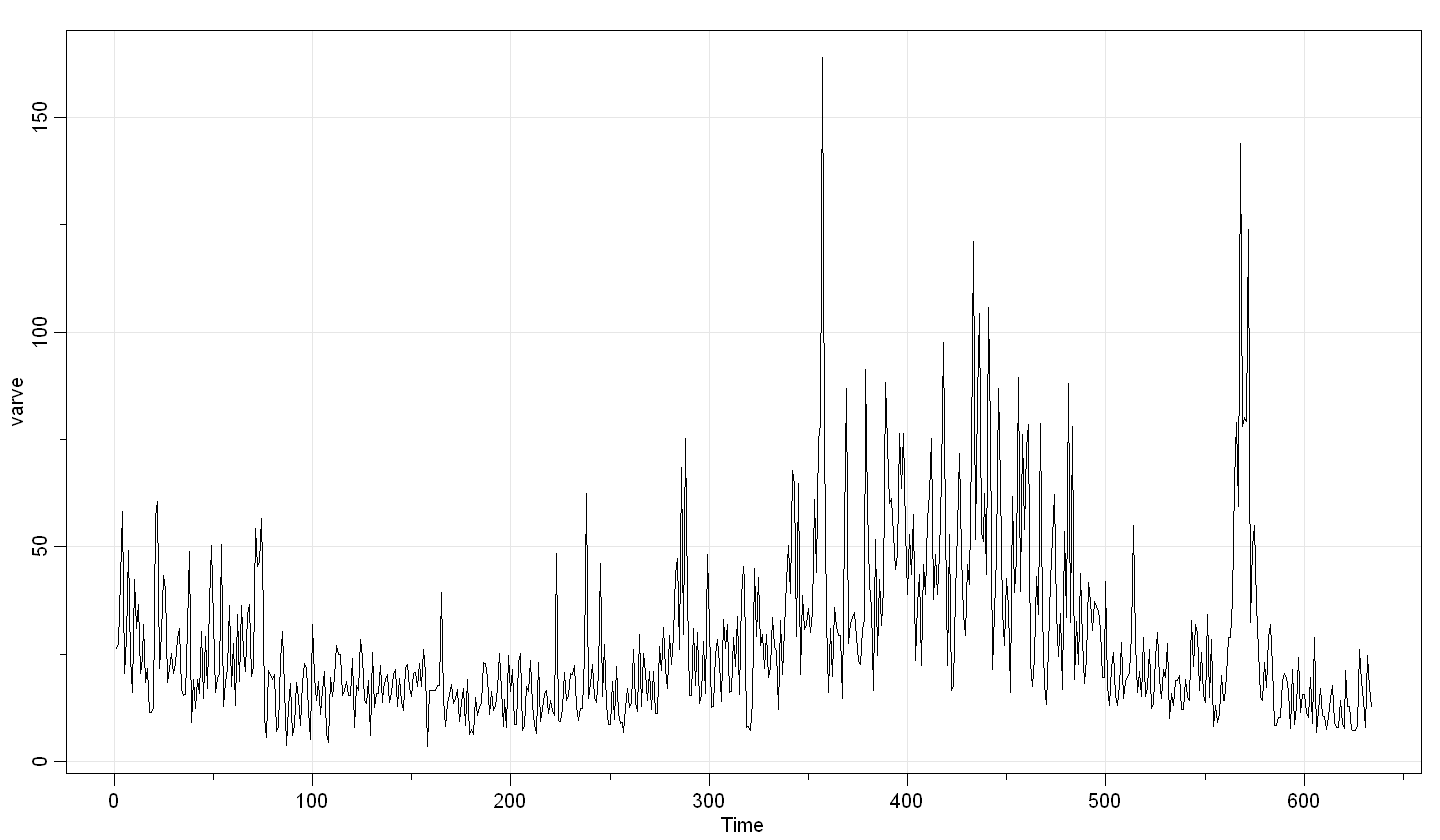

In [14]:
tsplot(varve)


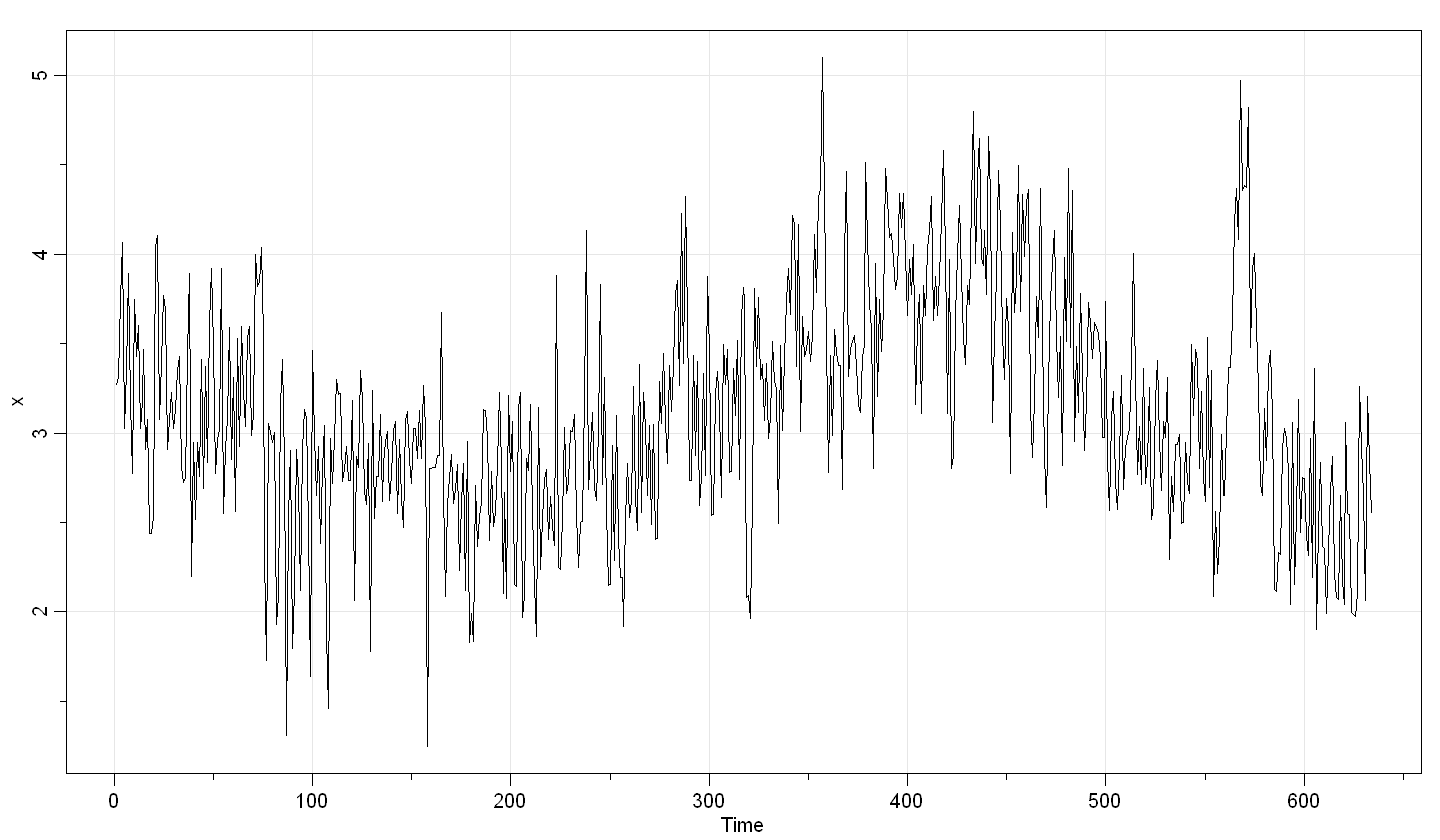

In [53]:
x = log(varve)
tsplot(x)

ACF,0.59,0.51,0.46,0.46,0.46,0.46,0.43,0.43,0.41,0.37,...,0.30,0.27,0.28,0.28,0.28,0.28,0.23,0.23,0.25,0.23
PACF,0.59,0.24,0.15,0.16,0.13,0.11,0.05,0.08,0.02,-0.02,...,0.03,-0.05,0.01,0.00,0.02,0.02,-0.05,0.01,0.01,-0.02


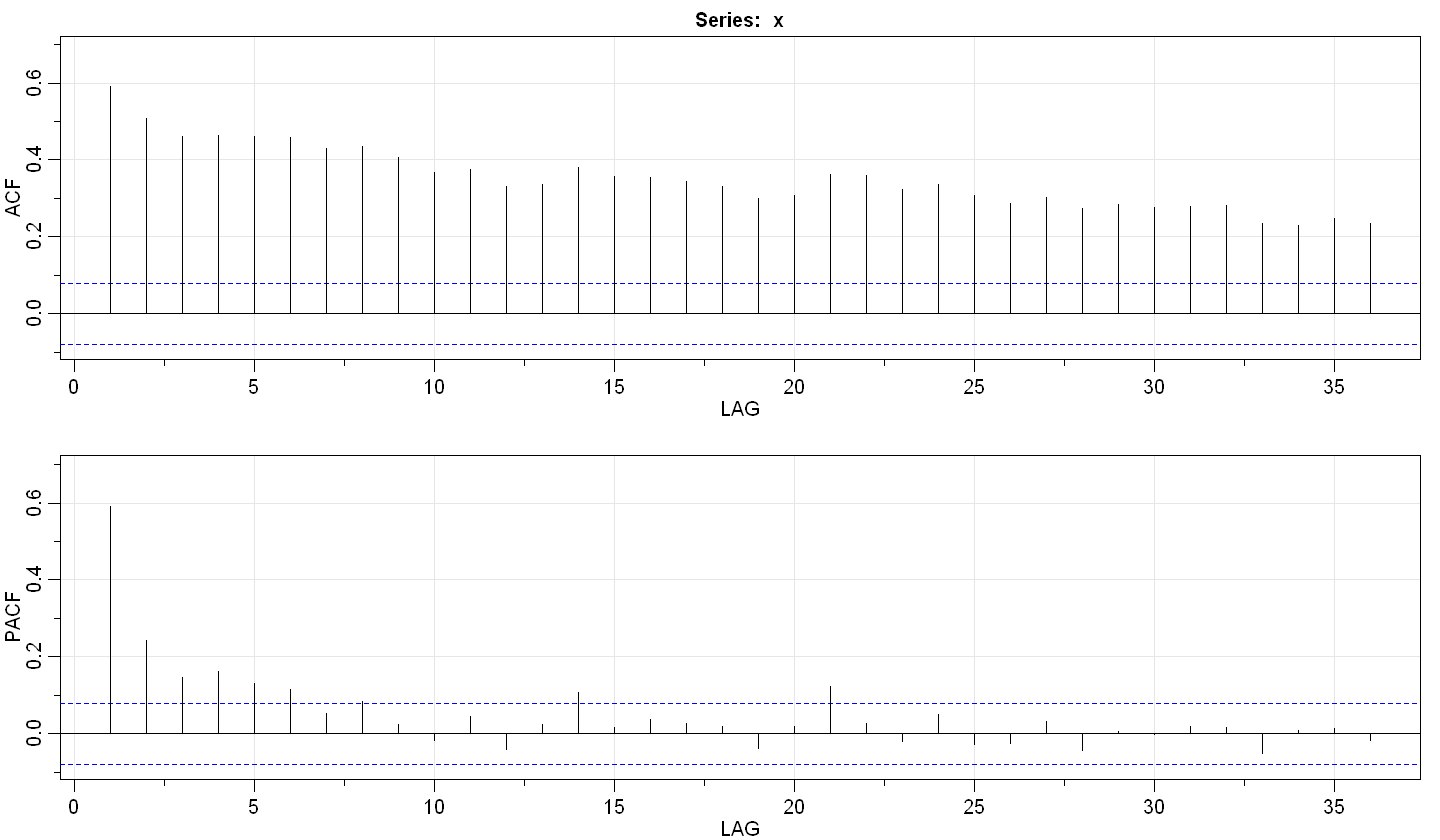

In [54]:
acf2(x)

$Observaciòn:$ Dado los resulados del ACF y PACF, sumado al haber realizado un "diff" del log(x) una vez, podemos pensar en 2 modelos posibles:

$$y_t = x_t - x_{t-1} + w_t $$

Arima(0,1,1) o Arima(5,1,1)




	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 20.465, df = 9, p-value = 0.01525

Model df: 1.   Total lags used: 10



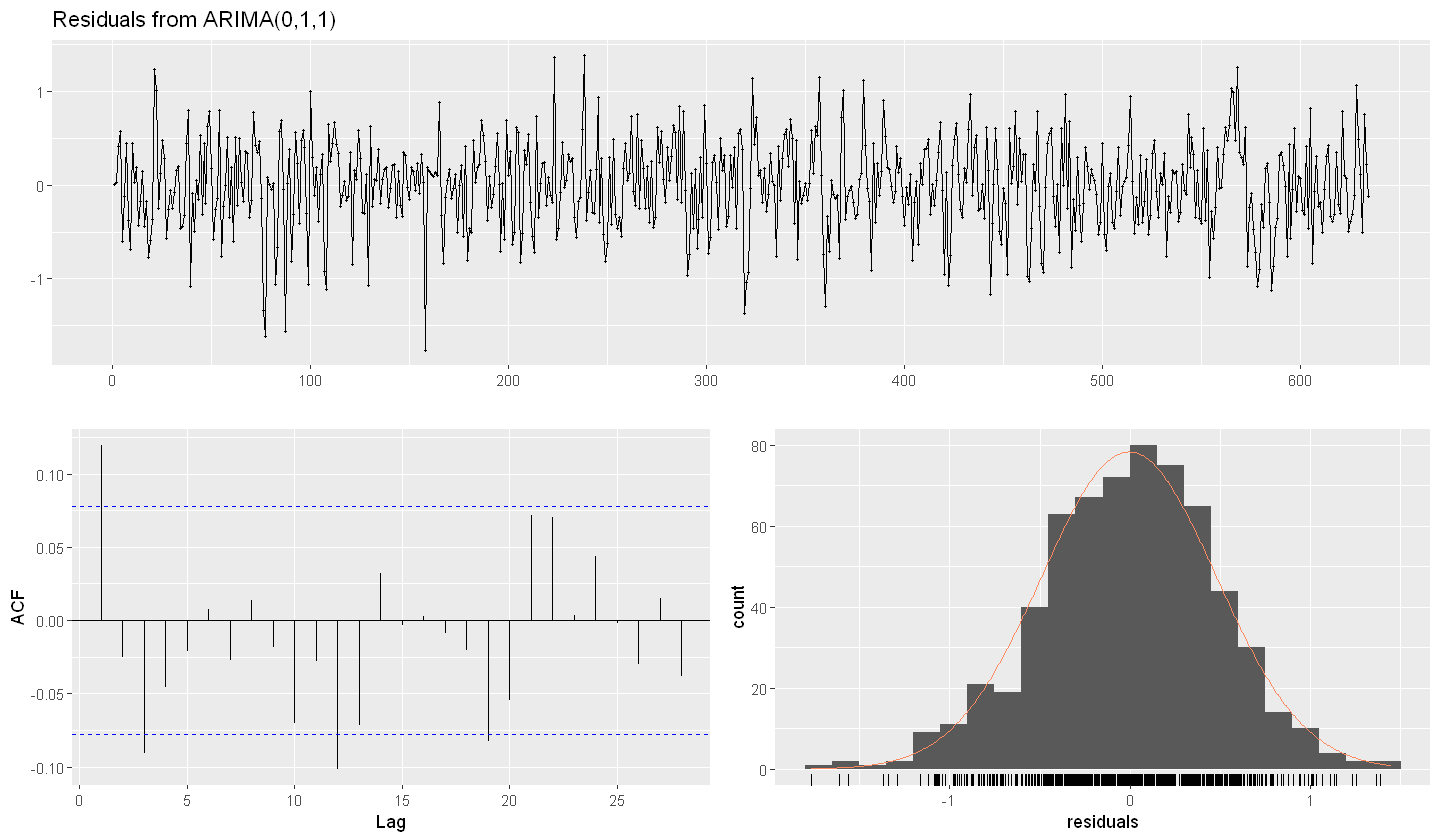

In [55]:
fit1 = Arima(x , order = c(0,1,1))

checkresiduals(fit1)



	Ljung-Box test

data:  Residuals from ARIMA(5,1,1)
Q* = 5.193, df = 4, p-value = 0.2681

Model df: 6.   Total lags used: 10



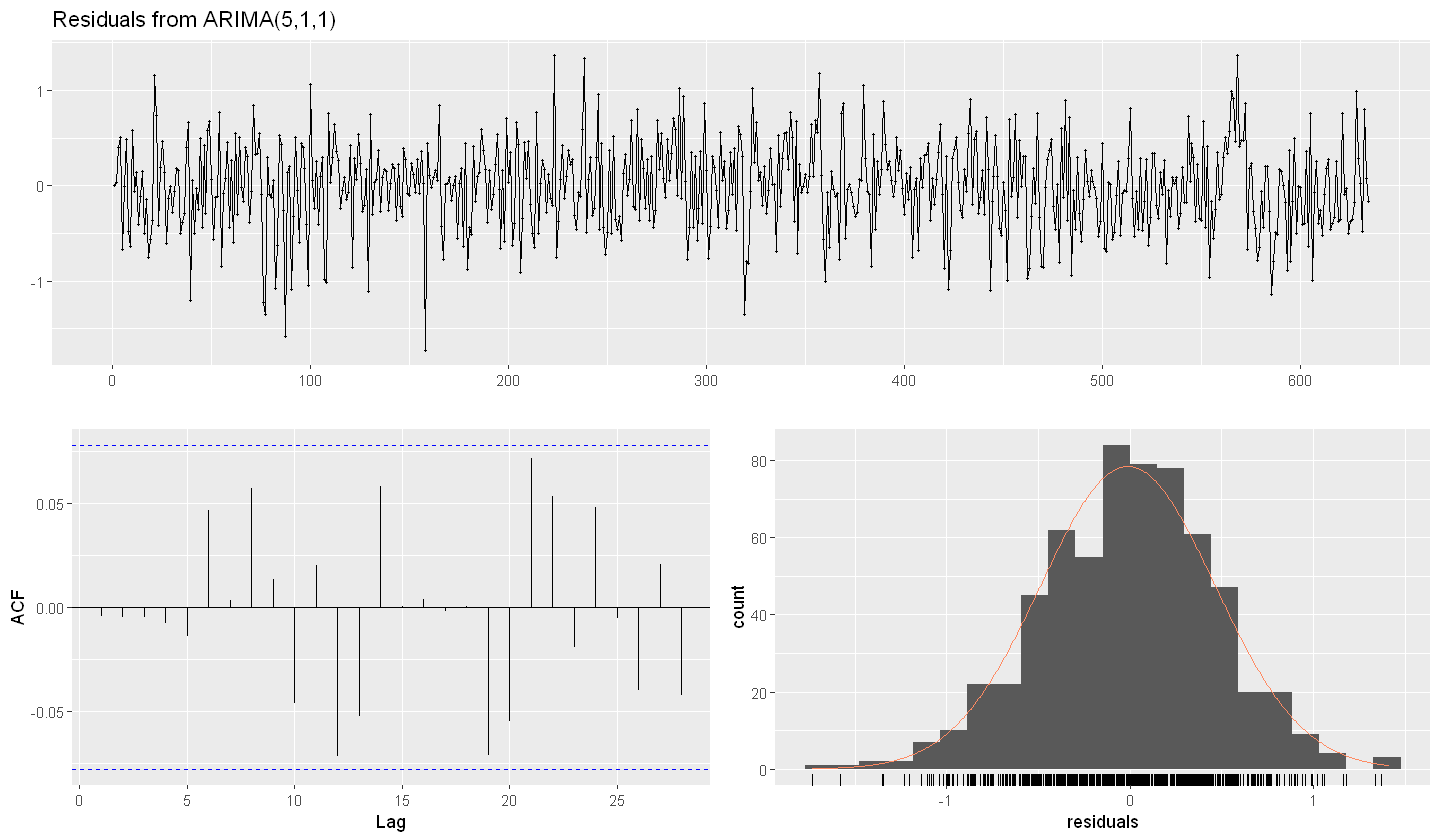

In [56]:
fit2 = Arima(x , order = c(5,1,1))

checkresiduals(fit2)



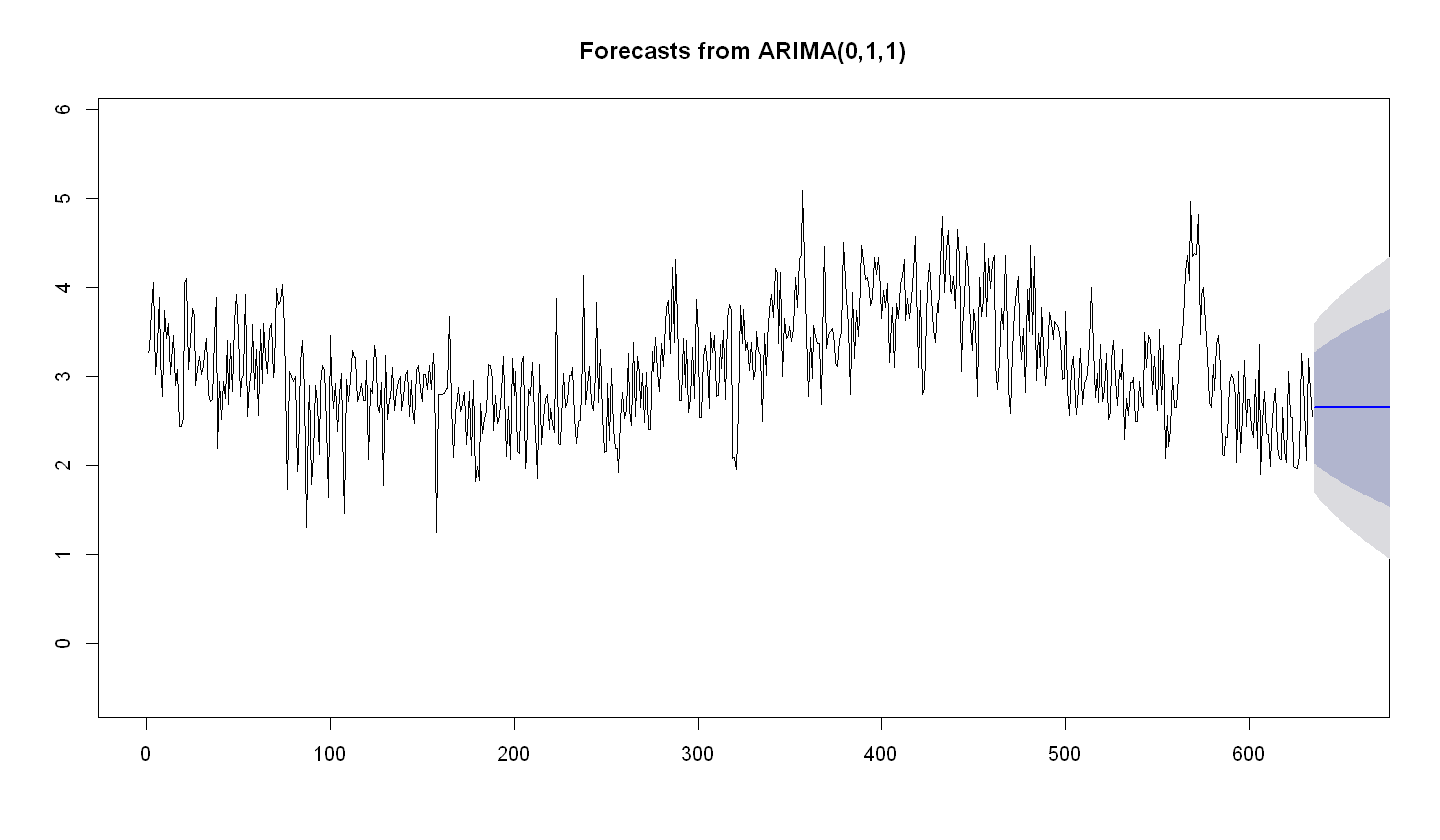

In [64]:

plot(forecast(fit1, h=200), xlim = c(0,650))
pred1 = forecast(fit1, h=200)


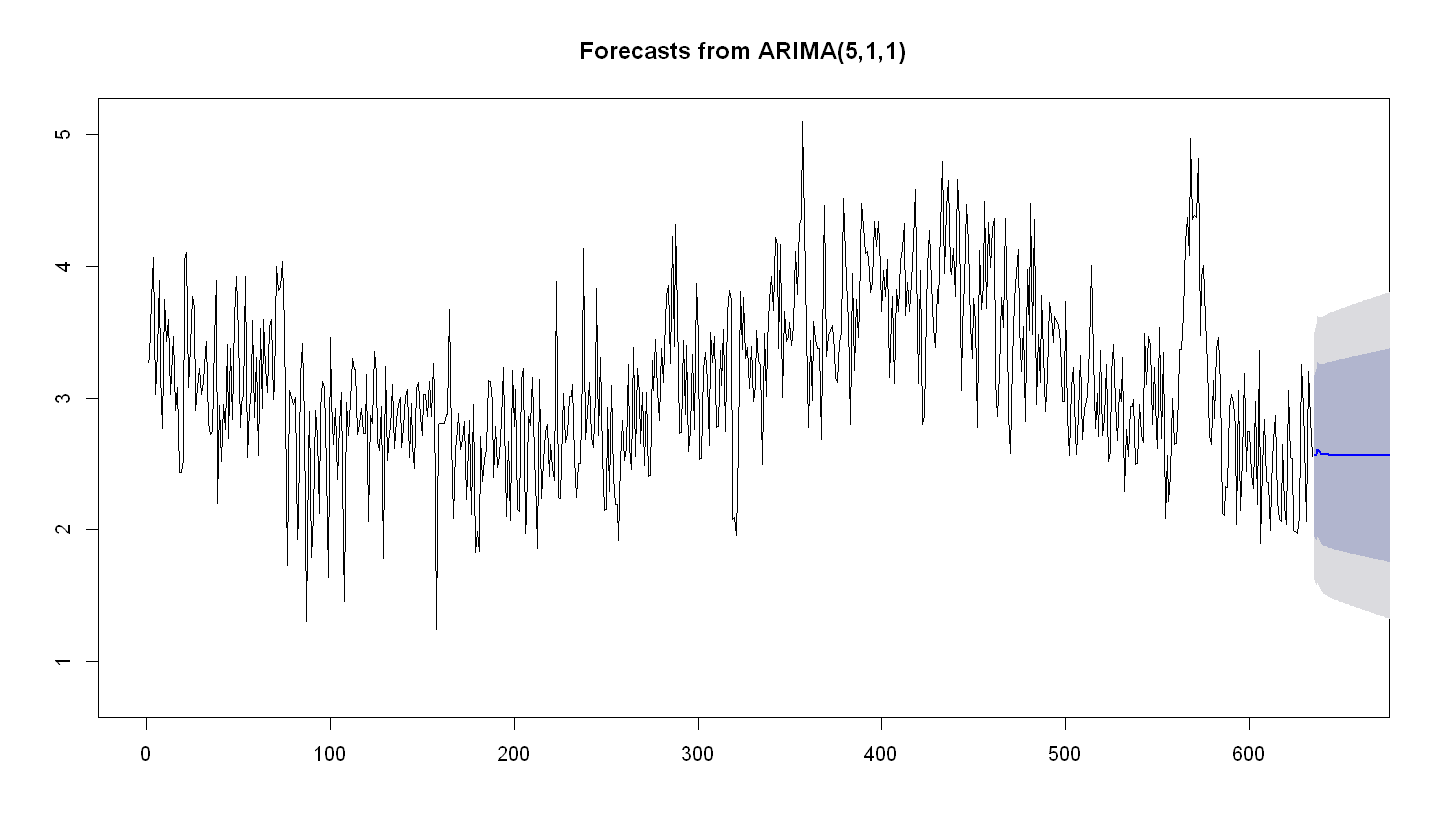

In [63]:
plot(forecast(fit2, h=200), xlim = c(0,650))

In [59]:
coef(fit1)
coef(fit2)

ma1 
-0.7705399

ar1           ar2           ar3           ar4           ar5 
 0.2760348654  0.0704362686 -0.0007319404  0.0510282946  0.0533580644 
          ma1 
-0.9381194655

In [65]:
AIC(fit1)
BIC(fit2)

[1] 885.435

[1] 904.1761

$Observaciòn: $ Luego de analizar los distintos modelos, podemos concluir que al realizar el ARIMA(5,1,1) se logra extraer toda la informaciòn de la serie hasta llegar a obtener unos residuos iguales a ruido blanco Gaussiano. 